<h3 style="font-size:30px;">ANALISIS NILAI MAHASISWA</h3>

<h2 style="font-size:20px;">IMPORT LIBRARY</h2>

In [4]:
import csv
import matplotlib.pyplot as plt

<h2 style="font-size:20px;">LOAD DATA CSV + EXCEPTION HANDLING</h2>

In [41]:
data = [] 

try:
    with open("nilai_mahasiswa.csv", newline="") as file:
        reader = csv.reader(file)
        next(reader) 

        for row in reader:
            if len(row) < 5:
                continue
            nama = row[0]
            nim = row[1]
            tugas = float(row[2])
            uts = float(row[3])
            uas = float(row[4])
            data.append([nama, nim, tugas, uts, uas])

    print("File berhasil dibaca")

except FileNotFoundError:
    print("File tidak ditemukan")
except ValueError:
    print("Format data salah")

File berhasil dibaca


<h2 style="font-size:20px;">PREPROCESSING</h2>

In [6]:
print("\nData awal mahasiswa:")
print("Nama\tNIM\t\tTugas\tUTS\tUAS")
for row in data:
    print(f"{row[0]}\t{row[1]}\t{row[2]}\t{row[3]}\t{row[4]}")

print("\nJumlah data mahasiswa:", len(data))


Data awal mahasiswa:
Nama	NIM		Tugas	UTS	UAS
Raka	124400043	85.0	80.0	90.0
Andry	124400075	65.0	70.0	60.0
Steven	124400003	40.0	50.0	30.0
Dinda	124400059	50.0	30.0	40.0
Ari	124400081	88.0	70.0	73.0
Safa	124400020	88.0	78.0	82.0
Danisha	124400007	72.0	70.0	50.0
Vaulina	124400011	70.0	65.0	72.0
Octa	124400038	90.0	58.0	55.0
Febrio	124400050	85.0	88.0	80.0

Jumlah data mahasiswa: 10


<h2 style="font-size:20px;">FUNGSI DEF</h2>

In [44]:
def hitung_nilai_akhir(tugas, uts, uas):
    return (0.30 * tugas) + (0.35 * uts) + (0.35 * uas)

hasil = hitung_nilai_akhir(90, 58, 55)
print("Nilai akhir:", hasil)

Nilai akhir: 66.55


<h2 style="font-size:20px;">FUNGSI LAMBDA</h2>

In [46]:
pembulatan = lambda x: round(x, 1)

hasil = hitung_nilai_akhir(80, 75, 90)
print("Nilai pembulatan:", pembulatan(hasil))

Nilai pembulatan: 81.8


<h2 style="font-size:20px;">PERCABANGAN</h2>

In [9]:
def tentukan_grade(nilai_akhir):
    if nilai_akhir > 75:
        return "A"
    elif nilai_akhir > 70:
        return "AB"
    elif nilai_akhir > 65:
        return "B"
    elif nilai_akhir > 60:
        return "BC"
    elif nilai_akhir > 55:
        return "C"
    elif nilai_akhir > 50:
        return "CD"
    else:
        return "D"

<h2 style="font-size:20px;">OOP</h2>

In [10]:
class Mahasiswa:
    def __init__(self, nama, nim, tugas, uts, uas):
        self.nama = nama
        self.nim = nim
        self.tugas = tugas
        self.uts = uts
        self.uas = uas
        self.nilai_akhir = 0
        self.grade = ""
        self.status = ""

    def hitung_nilai_akhir(self):
        self.nilai_akhir = (0.30*self.tugas) + (0.35*self.uts) + (0.35*self.uas)

    def tentukan_grade(self):
        if self.nilai_akhir > 75:
            self.grade = "A"
        elif self.nilai_akhir > 70:
            self.grade = "AB"
        elif self.nilai_akhir > 65:
            self.grade = "B"
        elif self.nilai_akhir > 60:
            self.grade = "BC"
        elif self.nilai_akhir > 55:
            self.grade = "C"
        elif self.nilai_akhir > 50:
            self.grade = "CD"
        else:
            self.grade = "D"

    def tentukan_status(self):
        self.status = "Lulus" if self.nilai_akhir > 50 else "Tidak Lulus"

<h2 style="font-size:20px;">LOOPING</h2>

In [11]:
hasil = []

for item in data:
    mhs = Mahasiswa(item[0], item[1], item[2], item[3], item[4])
    mhs.hitung_nilai_akhir()
    mhs.nilai_akhir = pembulatan(mhs.nilai_akhir)
    mhs.tentukan_grade()
    mhs.tentukan_status()

    hasil.append([mhs.nama, mhs.nim, mhs.nilai_akhir, mhs.grade, mhs.status])

In [12]:
print("\nHasil Analisis Nilai (OOP):")
print("Nama\tNIM\t\tNilaiAkhir\tGrade\tStatus")
for h in hasil:
    print(f"{h[0]}\t{h[1]}\t{h[2]}\t\t{h[3]}\t{h[4]}")


Hasil Analisis Nilai (OOP):
Nama	NIM		NilaiAkhir	Grade	Status
Raka	124400043	85.0		A	Lulus
Andry	124400075	65.0		BC	Lulus
Steven	124400003	40.0		D	Tidak Lulus
Dinda	124400059	39.5		D	Tidak Lulus
Ari	124400081	76.45		A	Lulus
Safa	124400020	82.4		A	Lulus
Danisha	124400007	63.6		BC	Lulus
Vaulina	124400011	68.95		B	Lulus
Octa	124400038	66.55		B	Lulus
Febrio	124400050	84.3		A	Lulus


<h2 style="font-size:20px;">MEYIMPAN KE FILE CSV BARU</h2> 

In [13]:
with open("hasil_analisis_nilai.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Nama", "NIM", "Nilai Akhir", "Grade", "Status"])
    writer.writerows(hasil)

print("\nFile hasil_analisis_nilai.csv berhasil dibuat")


File hasil_analisis_nilai.csv berhasil dibuat


<h2 style="font-size:20px;">VISUALISASI GRAFIK</h2>

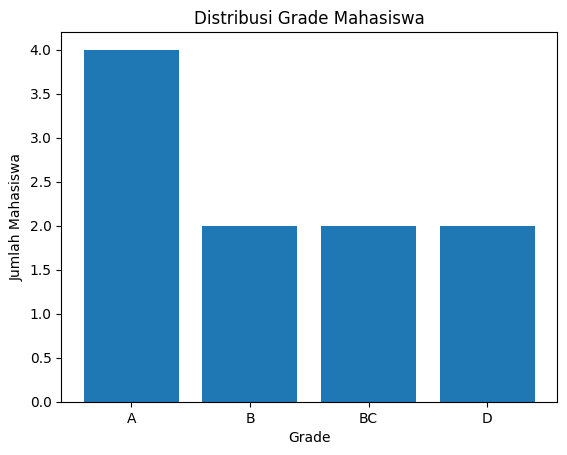

In [14]:
grades = [row[3] for row in hasil]
unique = sorted(set(grades))
jumlah = [grades.count(g) for g in unique]

plt.bar(unique, jumlah)
plt.title("Distribusi Grade Mahasiswa")
plt.xlabel("Grade")
plt.ylabel("Jumlah Mahasiswa")
plt.show()

<h2 style="font-size:20px;">KESIMPULAN</h2>